<a href="https://colab.research.google.com/github/manimaran1605/Dicke-Model/blob/main/VQE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install qutip

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.3/16.3 MB 21.6 MB/s eta 0:00:00


In [2]:
from qutip import *
import numpy as np
import matplotlib.pyplot as plt

/usr/local/lib/python3.10/dist-packages/qutip/__init__.py:66: UserWarning: The new version of Cython, (>= 3.0.0) is not supported.
  warnings.warn(


In [3]:
sxx = tensor(sigmax(), sigmax())
syy = tensor(sigmay(), sigmay())
szz = tensor(sigmaz(), sigmaz())
II = tensor(qeye(2), qeye(2))

In [4]:
H = II - 2 * sxx + 3 * syy - 2 * szz

In [5]:
H.groundstate()

(-6.000000000000001,
 Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
 Qobj data =
 [[0.70710678]
  [0.        ]
  [0.        ]
  [0.70710678]])

In [8]:
(1/np.sqrt(2))*(tensor(basis(2, 0), basis(2,0)) + tensor(basis(2,1), basis(2,0)))

Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[0.70710678]
 [0.        ]
 [0.70710678]
 [0.        ]]

In [31]:
def trial_state(theta):
    rot = np.cos(theta/2) * qeye(2) - 1j * np.sin(theta/2) * sigmay()
    return (1/np.sqrt(2))*(tensor(rot * basis(2, 0), basis(2,0)) + tensor(rot * basis(2,1), basis(2,1)))

trial_state(np.pi/2)

Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[ 0.5]
 [-0.5]
 [ 0.5]
 [ 0.5]]

In [32]:
theta_val = np.linspace(0, 4 * np.pi, 100)
eval = np.zeros(len(theta_val))
i = 0
for theta in theta_val:
  eval[i] = expect(H, trial_state(theta))
  i += 1

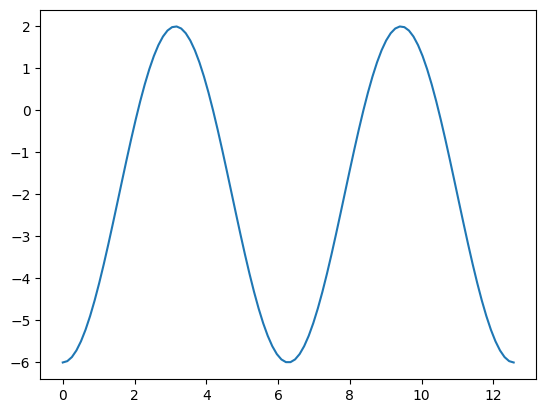

In [33]:
plt.plot(theta_val, eval)

In [34]:
id = np.argmin(eval)
eval[id]

-5.999999999999999